-Generates violin plots showing the distribution of properties for a dataset. <br>
-Performs Lipinski-Verber parameter analysis. <br>

Input csv files must be structured using one compound per row<br>

FOR GENERAL INPUTS <br>
---csv file must contain the following columns : "DEL", "ID", "Smiles"<br>

FOR PRE-CALCULATED INPUTS<br>
---csv file must contain a column called "DEL" <br>
---csv file must contain at least one column with numerical property values<br>
<br>
GENERAL USE<br>
-The first cell in this notebook must be run to import the csv data. It does not need to be re-run unless you have made changes to the csv file.<br>
---By defualt, this notebook will use datafiles that are created using the GenerateLibrary notebook so be sure to run it first.<br>
-Seperate violin plots will be grouped according to the unique entries in the "DEL" column <br>
-This notebook uses RDkit to calulate the following properties:  <br>
---MW, cLogP, H-Donors, H-Acceptors, Rotatable Bonds, Polar Surface Area<br>
-Additional properties can be calculated in datawarrior and pasted into a csv file and used as an input dataset<br>
-Additional properties can be added if they have been calulated from elsewhere using the "property" variable at the top of each cell

In [5]:
from Modules import MolProps
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem import rdMolDescriptors

#Use for a csv file containing the smile you wish to calculate the properties for
inputfile='Notebook Outputs/Combined_DELs.csv' 

#Name for the dataset (used for creation of the plot titles)
dataset='Example Libraries' 

#Calculate the properties on instantiation for the compounds in the input csv file
MolProps.CompoundProperties=MolProps.Properties(inputfile)




Perform Lipinski-Verber Analysis (optional)

In [6]:
Lipinski_dict, all_pass_df=MolProps.CompoundProperties.Check_Lipinski_Verber_Params()
total=len(MolProps.CompoundProperties.Smiles)
print('Compounds Analyzed:',total)
for k,v in Lipinski_dict.items():
    percent=round((v/total)*100,1)
    print(k,v,str(percent)+'%')

Compounds Analyzed: 7000
mol_wt 3384 48.3%
logp 6875 98.2%
h_donors 6757 96.5%
h_acceptors 6924 98.9%
rotatable_bonds 2495 35.6%
polar_surface_area 4273 61.0%
All 850 12.1%


Create output csv of compounds that pass all Lipinski-Verber parameters (optional)

In [ ]:
all_pass_df.to_csv('Notebook Outputs/LipinskiCompounds.csv')

Create violin plots for molecular weight distributions

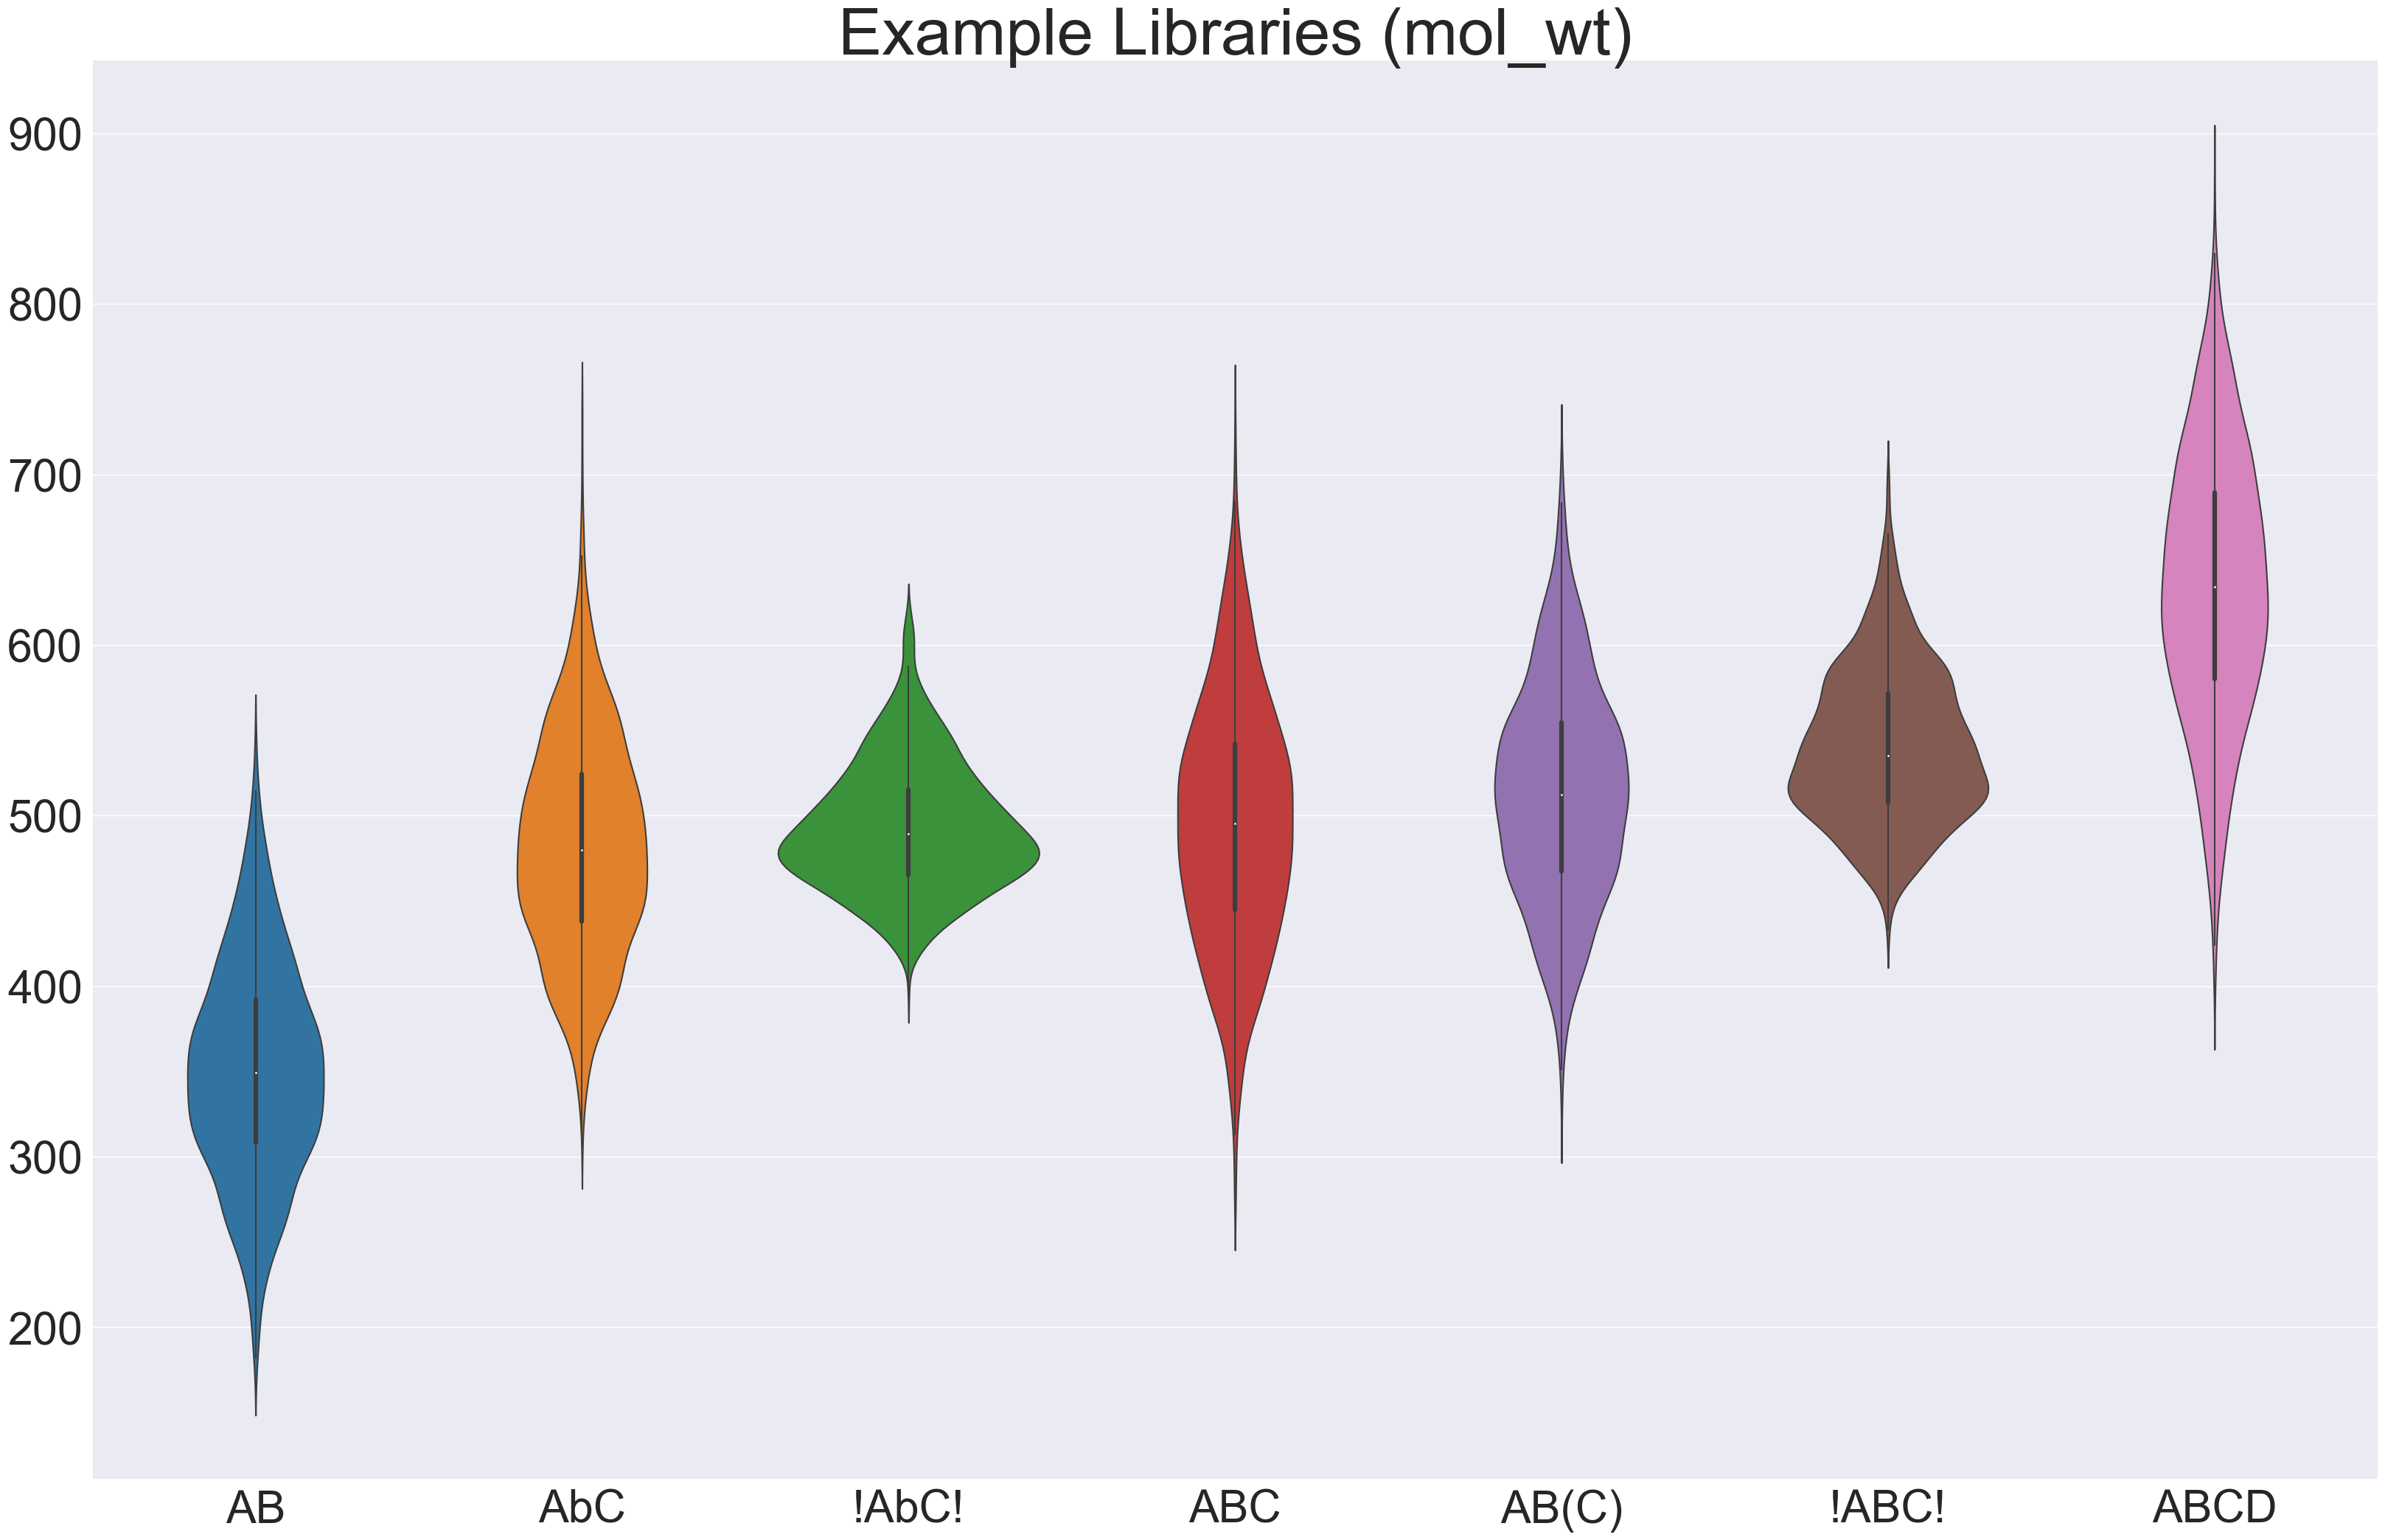

In [7]:
property='mol_wt'

plot_df=MolProps.CompoundProperties.assemble_plot_df(property)


#Comment this line on if you are importing from a csv with pre-calculated values
#prop_df=Property_Dataframe(property)

ax = sns.violinplot(data=plot_df, scale='area', palette=sns.color_palette('tab10'), inner='box')

sns.set(rc={'figure.figsize':(40, 25)})
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})  
sns.set(font_scale=4)
plt.title( str(dataset+' ('+property+')'), size =64 )

sns.set_style('ticks')
sns.despine()
plt.savefig("Notebook Outputs/"+str(dataset+'_'+property+'.svg'), bbox_inches='tight')

Create violin plots for logP distributions

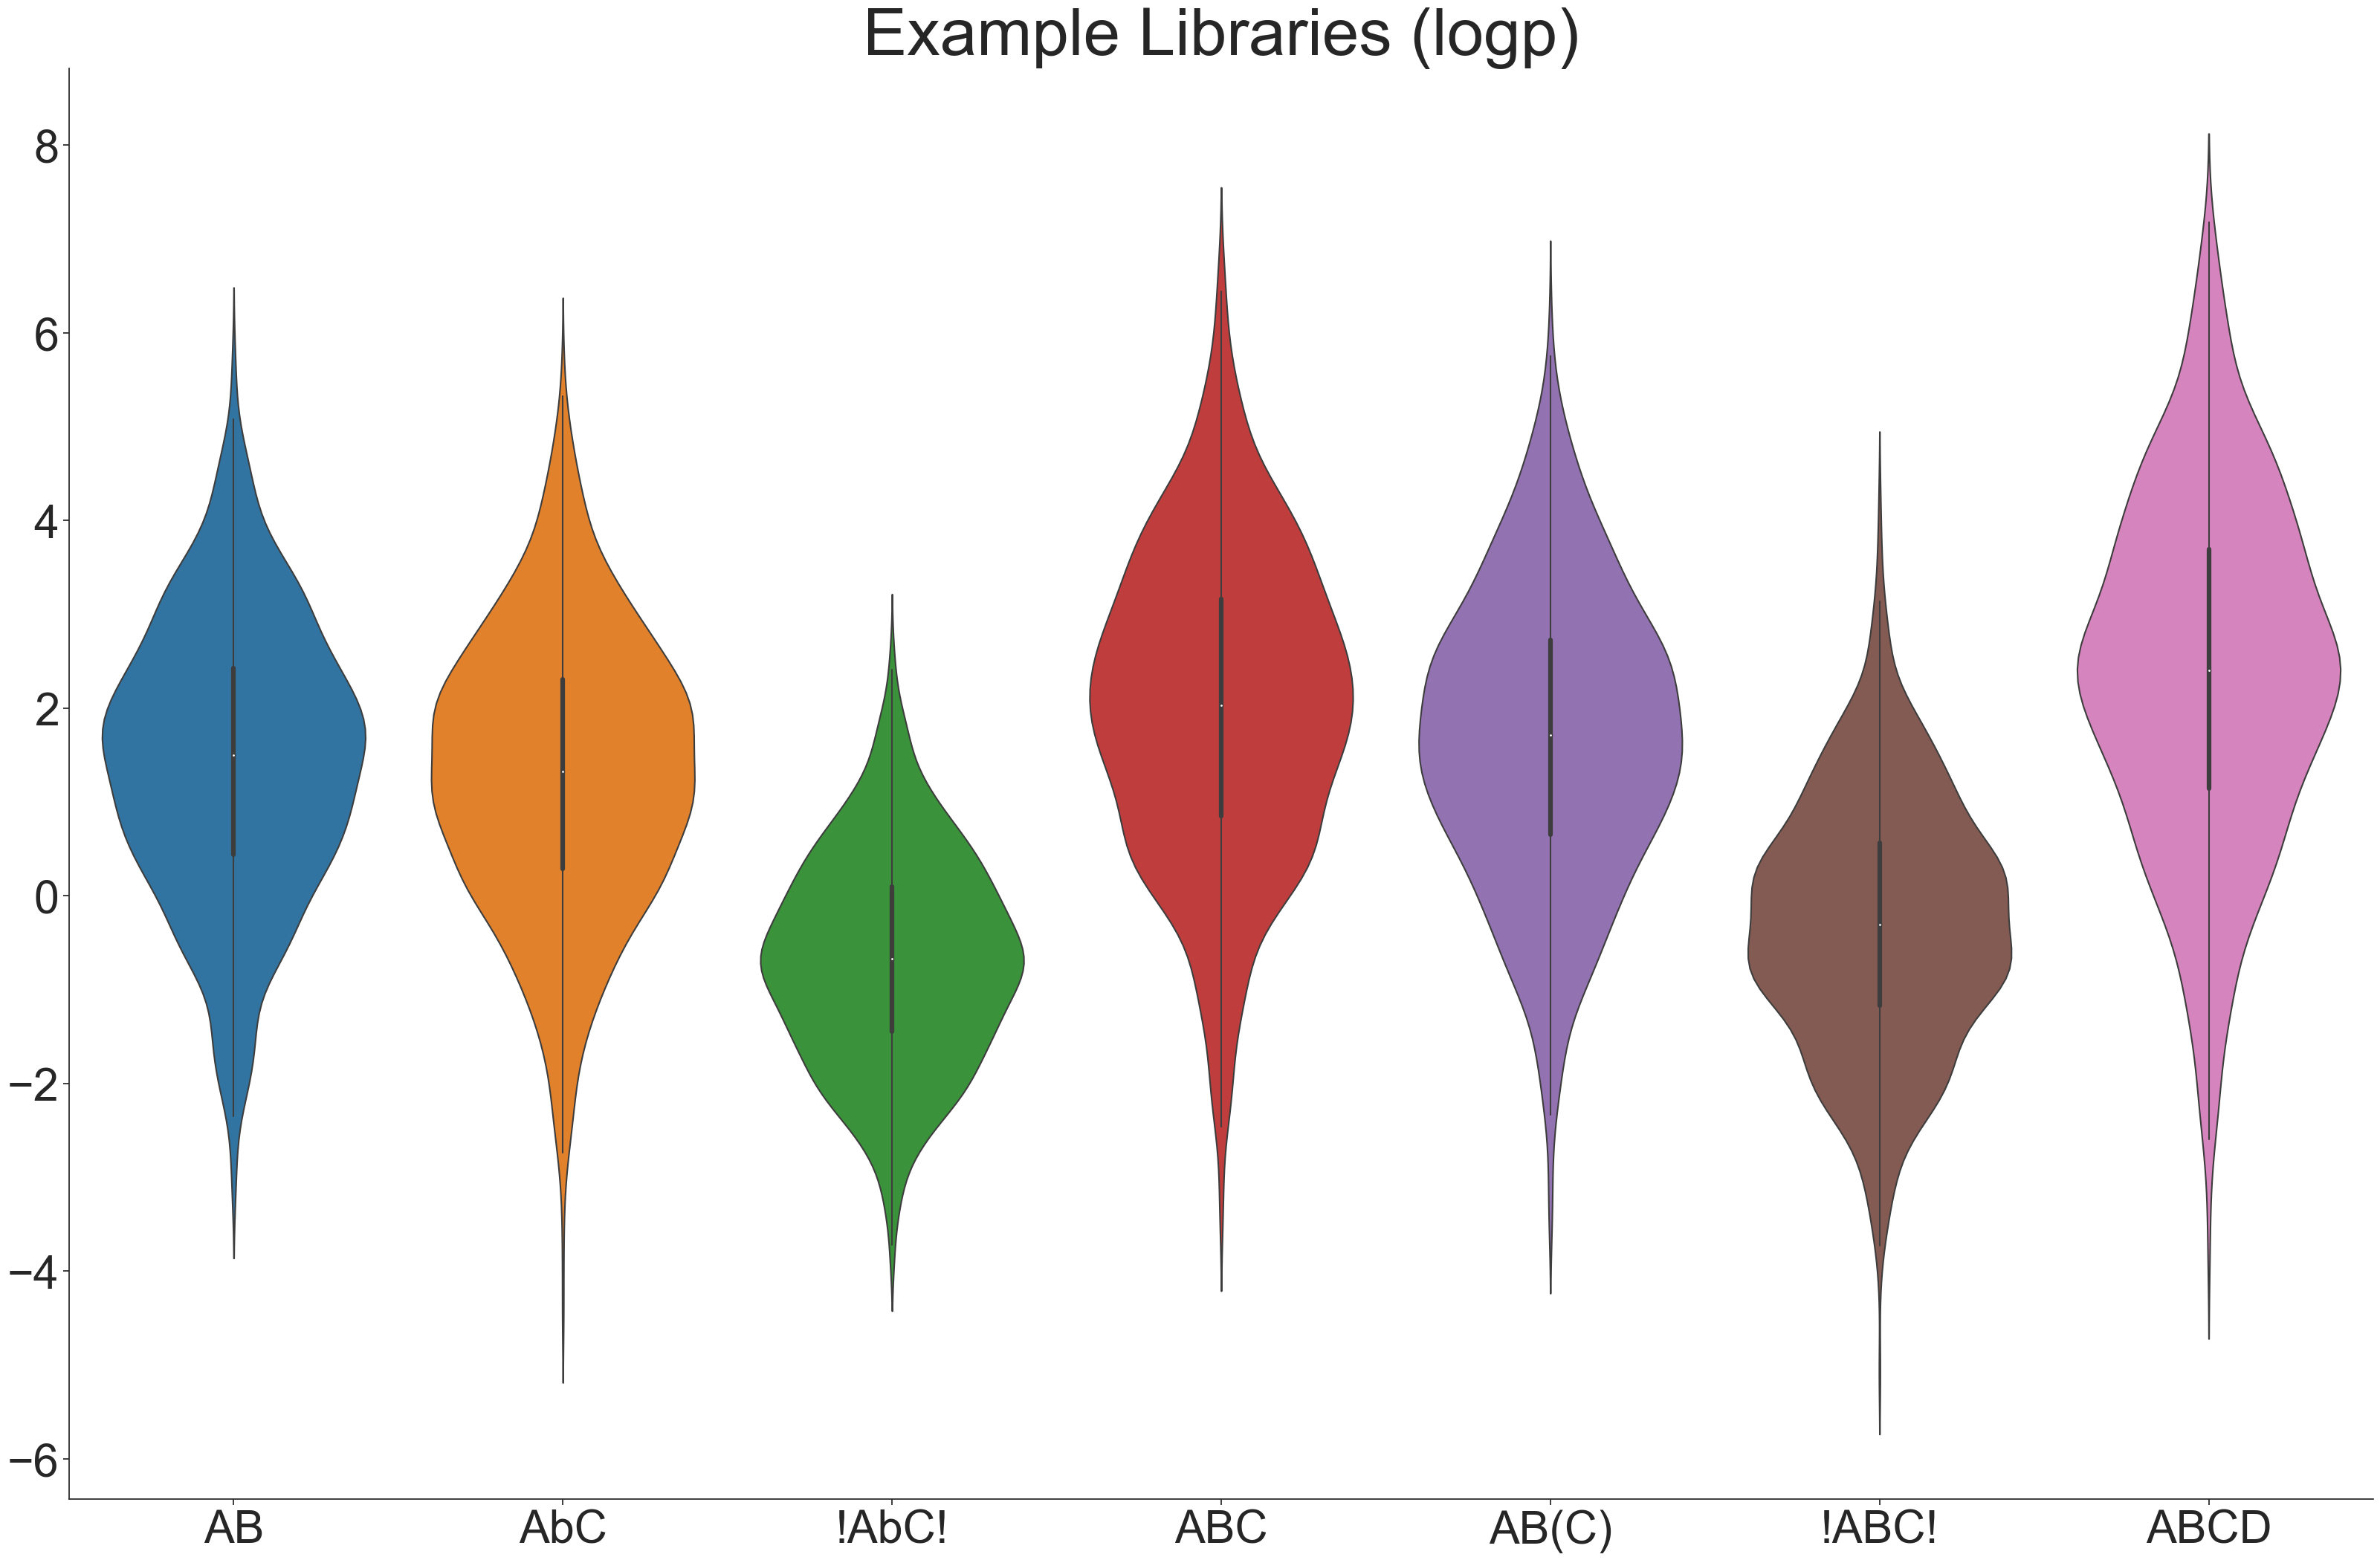

In [8]:
property='logp'

plot_df=MolProps.CompoundProperties.assemble_plot_df(property)

#Comment this line on if you are importing from a csv with pre-calculated values
#prop_df=Property_Dataframe(property)

ax = sns.violinplot(data=plot_df, scale='count', palette=sns.color_palette('tab10'), inner='box')

sns.set(rc={'figure.figsize':(40, 25)})
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})  
sns.set(font_scale=4)
plt.title( str(dataset+' ('+property+')'), size =64 )

sns.set_style('ticks')
sns.despine()
plt.savefig(str(dataset+'_'+property+'.svg'), bbox_inches='tight')

Create violin plots for H-donor distributions

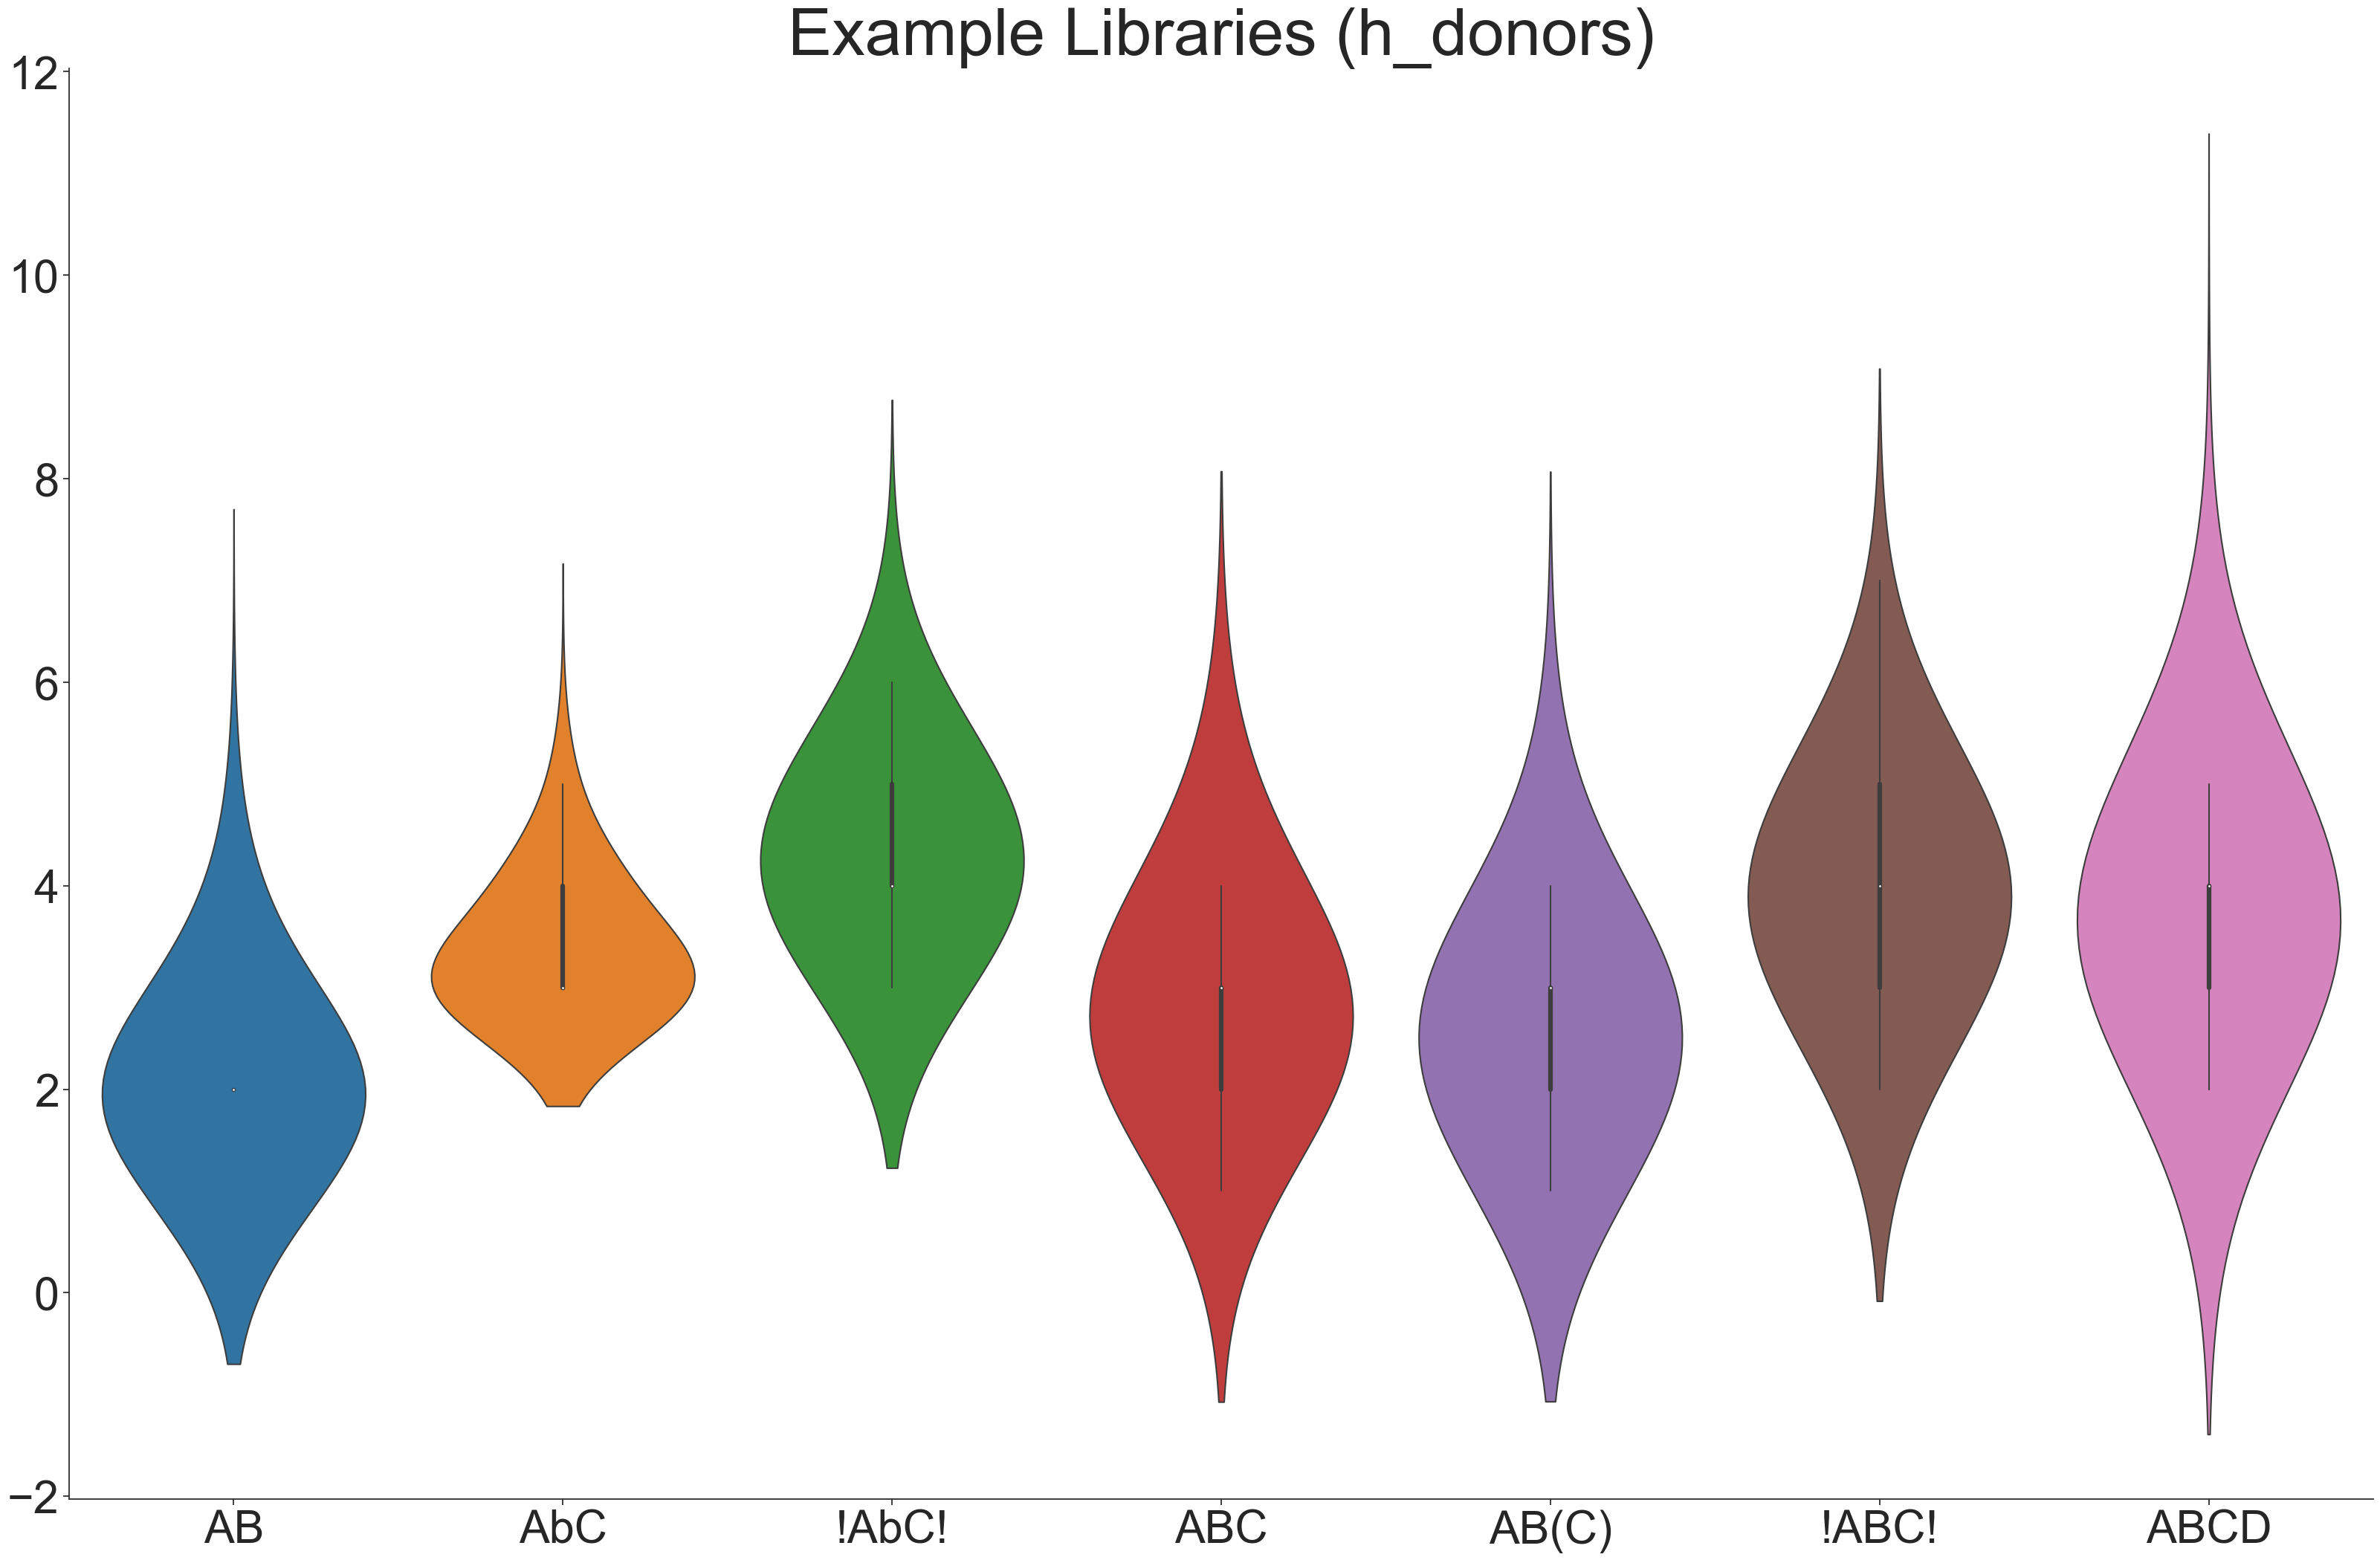

In [9]:
property='h_donors'

plot_df=MolProps.CompoundProperties.assemble_plot_df(property)

#Comment this line on if you are importing from a csv with pre-calculated values
#prop_df=Property_Dataframe(property)

ax = sns.violinplot(data=plot_df, scale='count', palette=sns.color_palette('tab10'), inner='box', bw=1)

sns.set(rc={'figure.figsize':(40, 25)})
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})  
sns.set(font_scale=4)
plt.title( str(dataset+' ('+property+')'), size =64 )

sns.set_style('ticks')
sns.despine()
plt.savefig(str(dataset+'_'+property+'.svg'), bbox_inches='tight')

Create violin plots for H-acceptor distributions

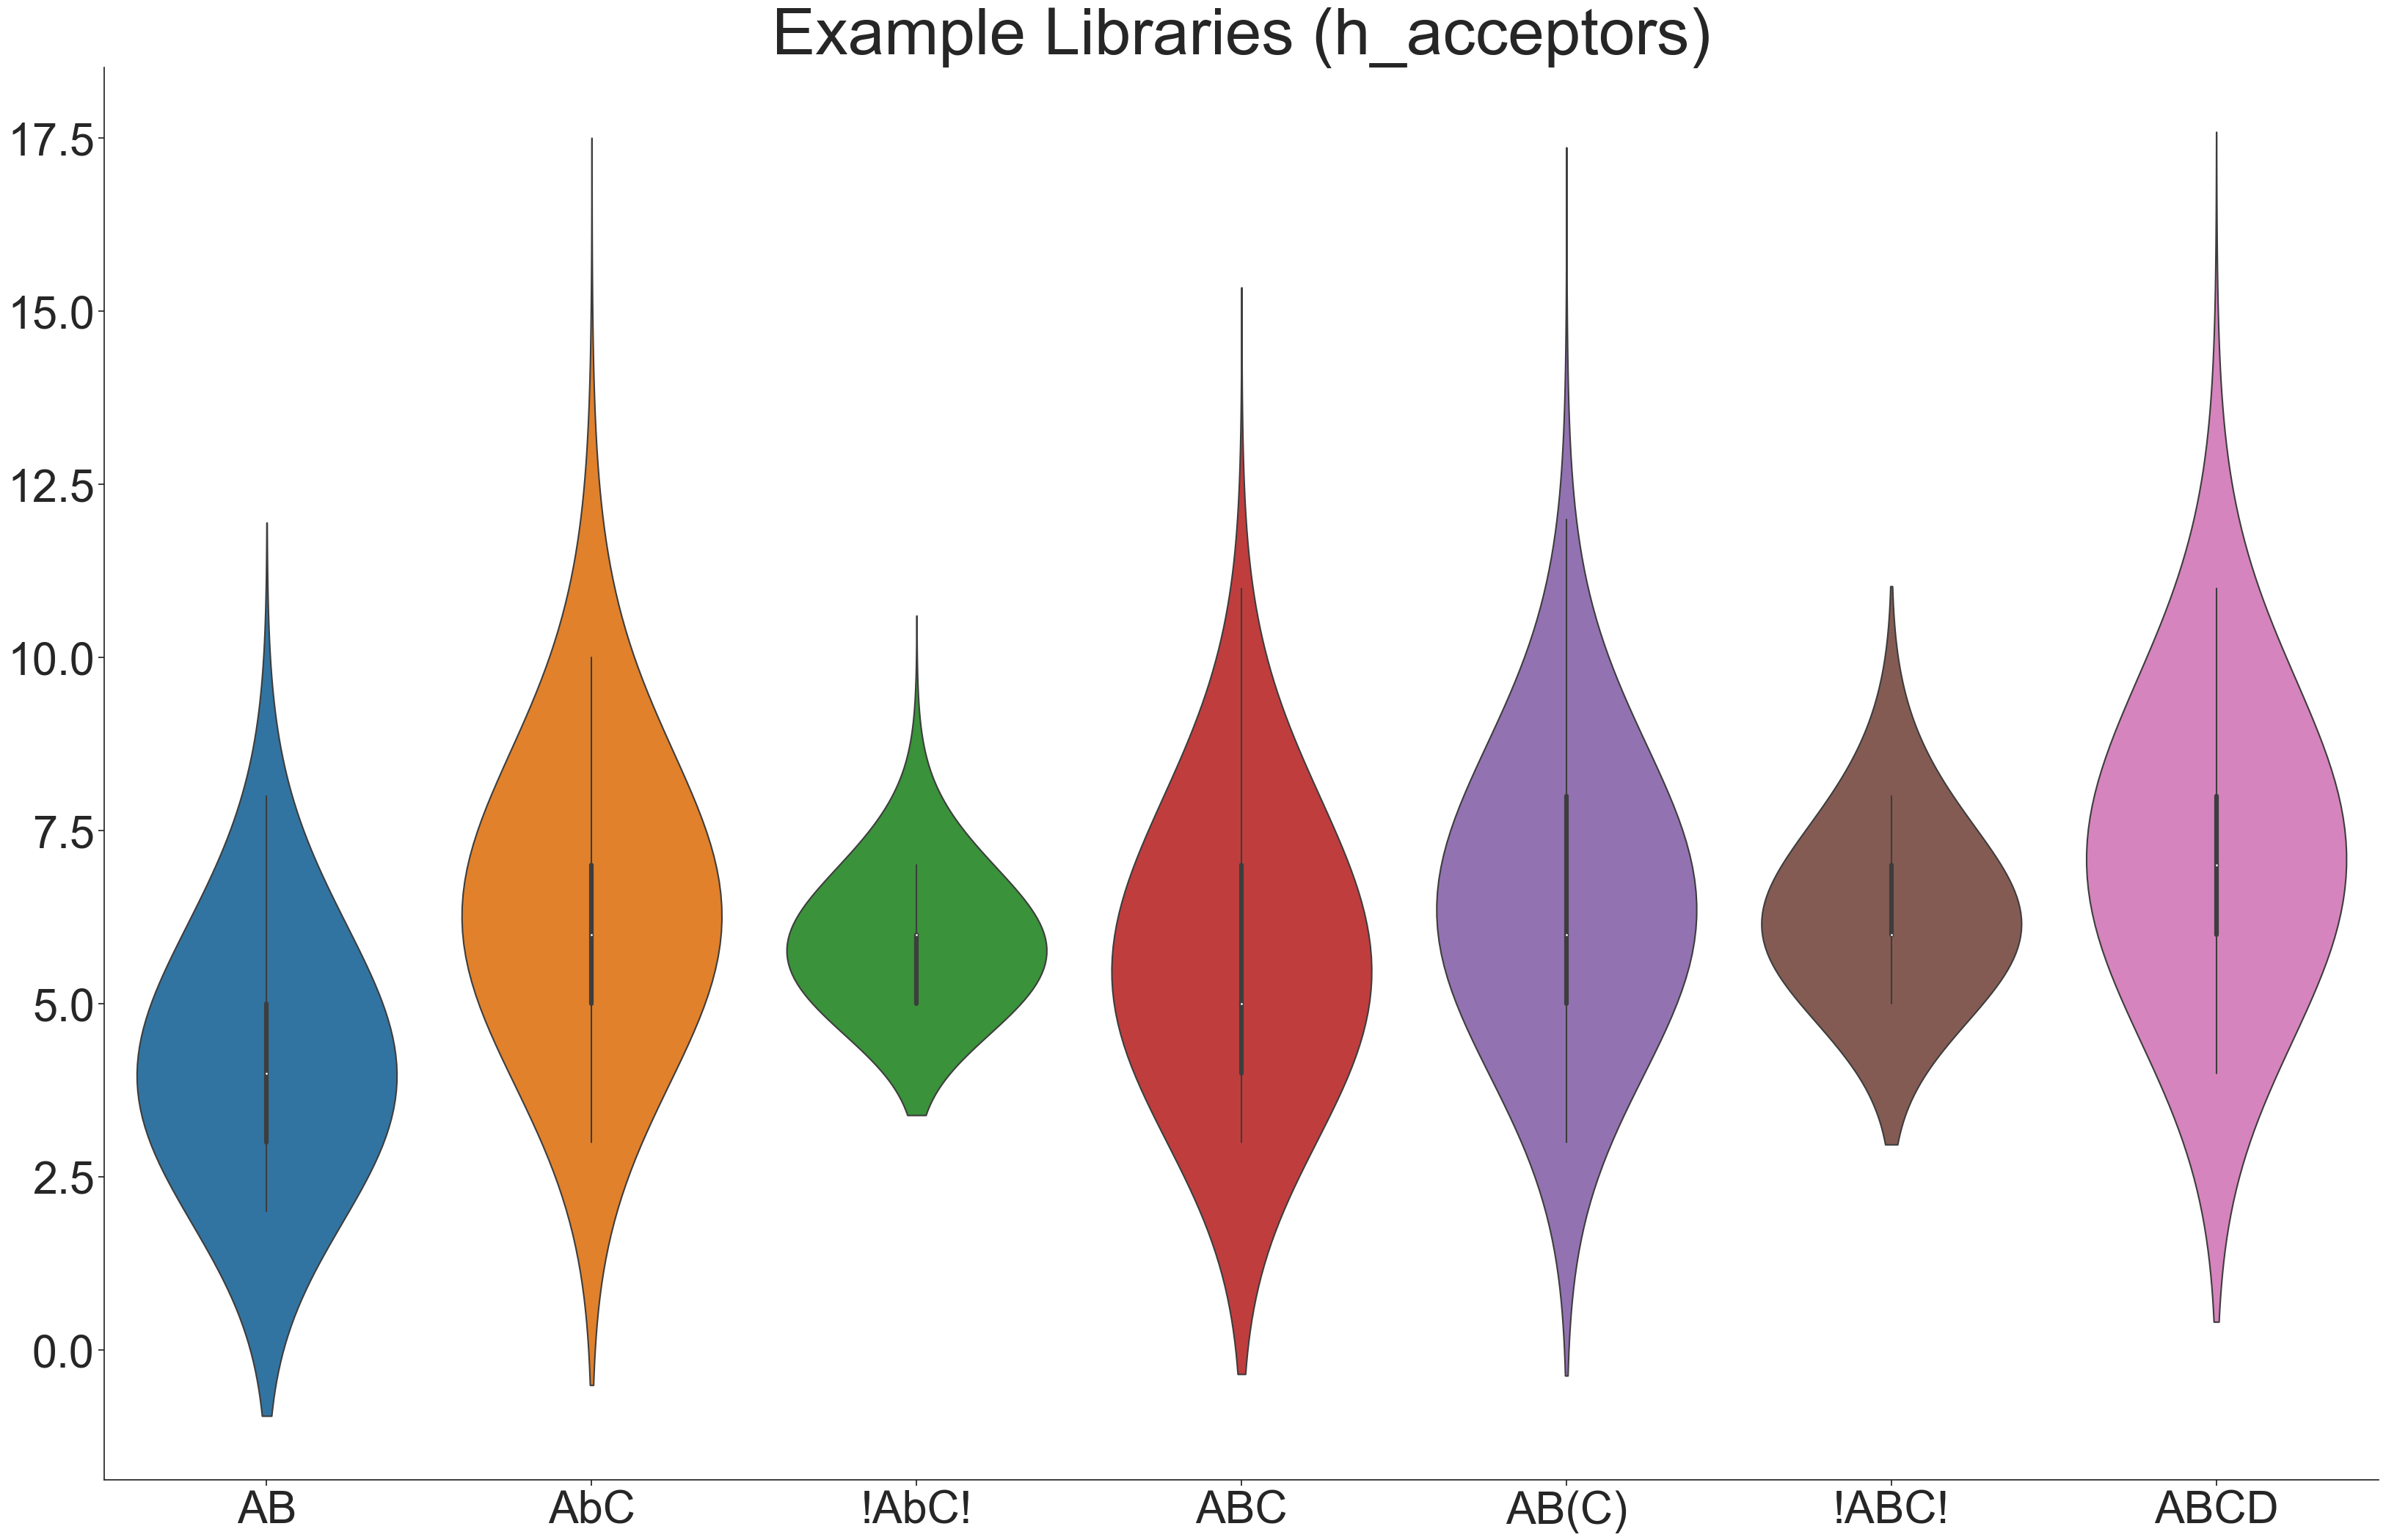

In [10]:
property='h_acceptors'

plot_df=MolProps.CompoundProperties.assemble_plot_df(property)

#Comment this line on if you are importing from a csv with pre-calculated values
#prop_df=Property_Dataframe(property)

ax = sns.violinplot(data=plot_df, scale='count', palette=sns.color_palette('tab10'), inner='box', bw=1)

sns.set(rc={'figure.figsize':(40, 25)})
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})  
sns.set(font_scale=4)
plt.title( str(dataset+' ('+property+')'), size =64 )

sns.set_style('ticks')
sns.despine()
plt.savefig(str(dataset+'_'+property+'.svg'), bbox_inches='tight')

Create violin plots for rotatable bond distributions

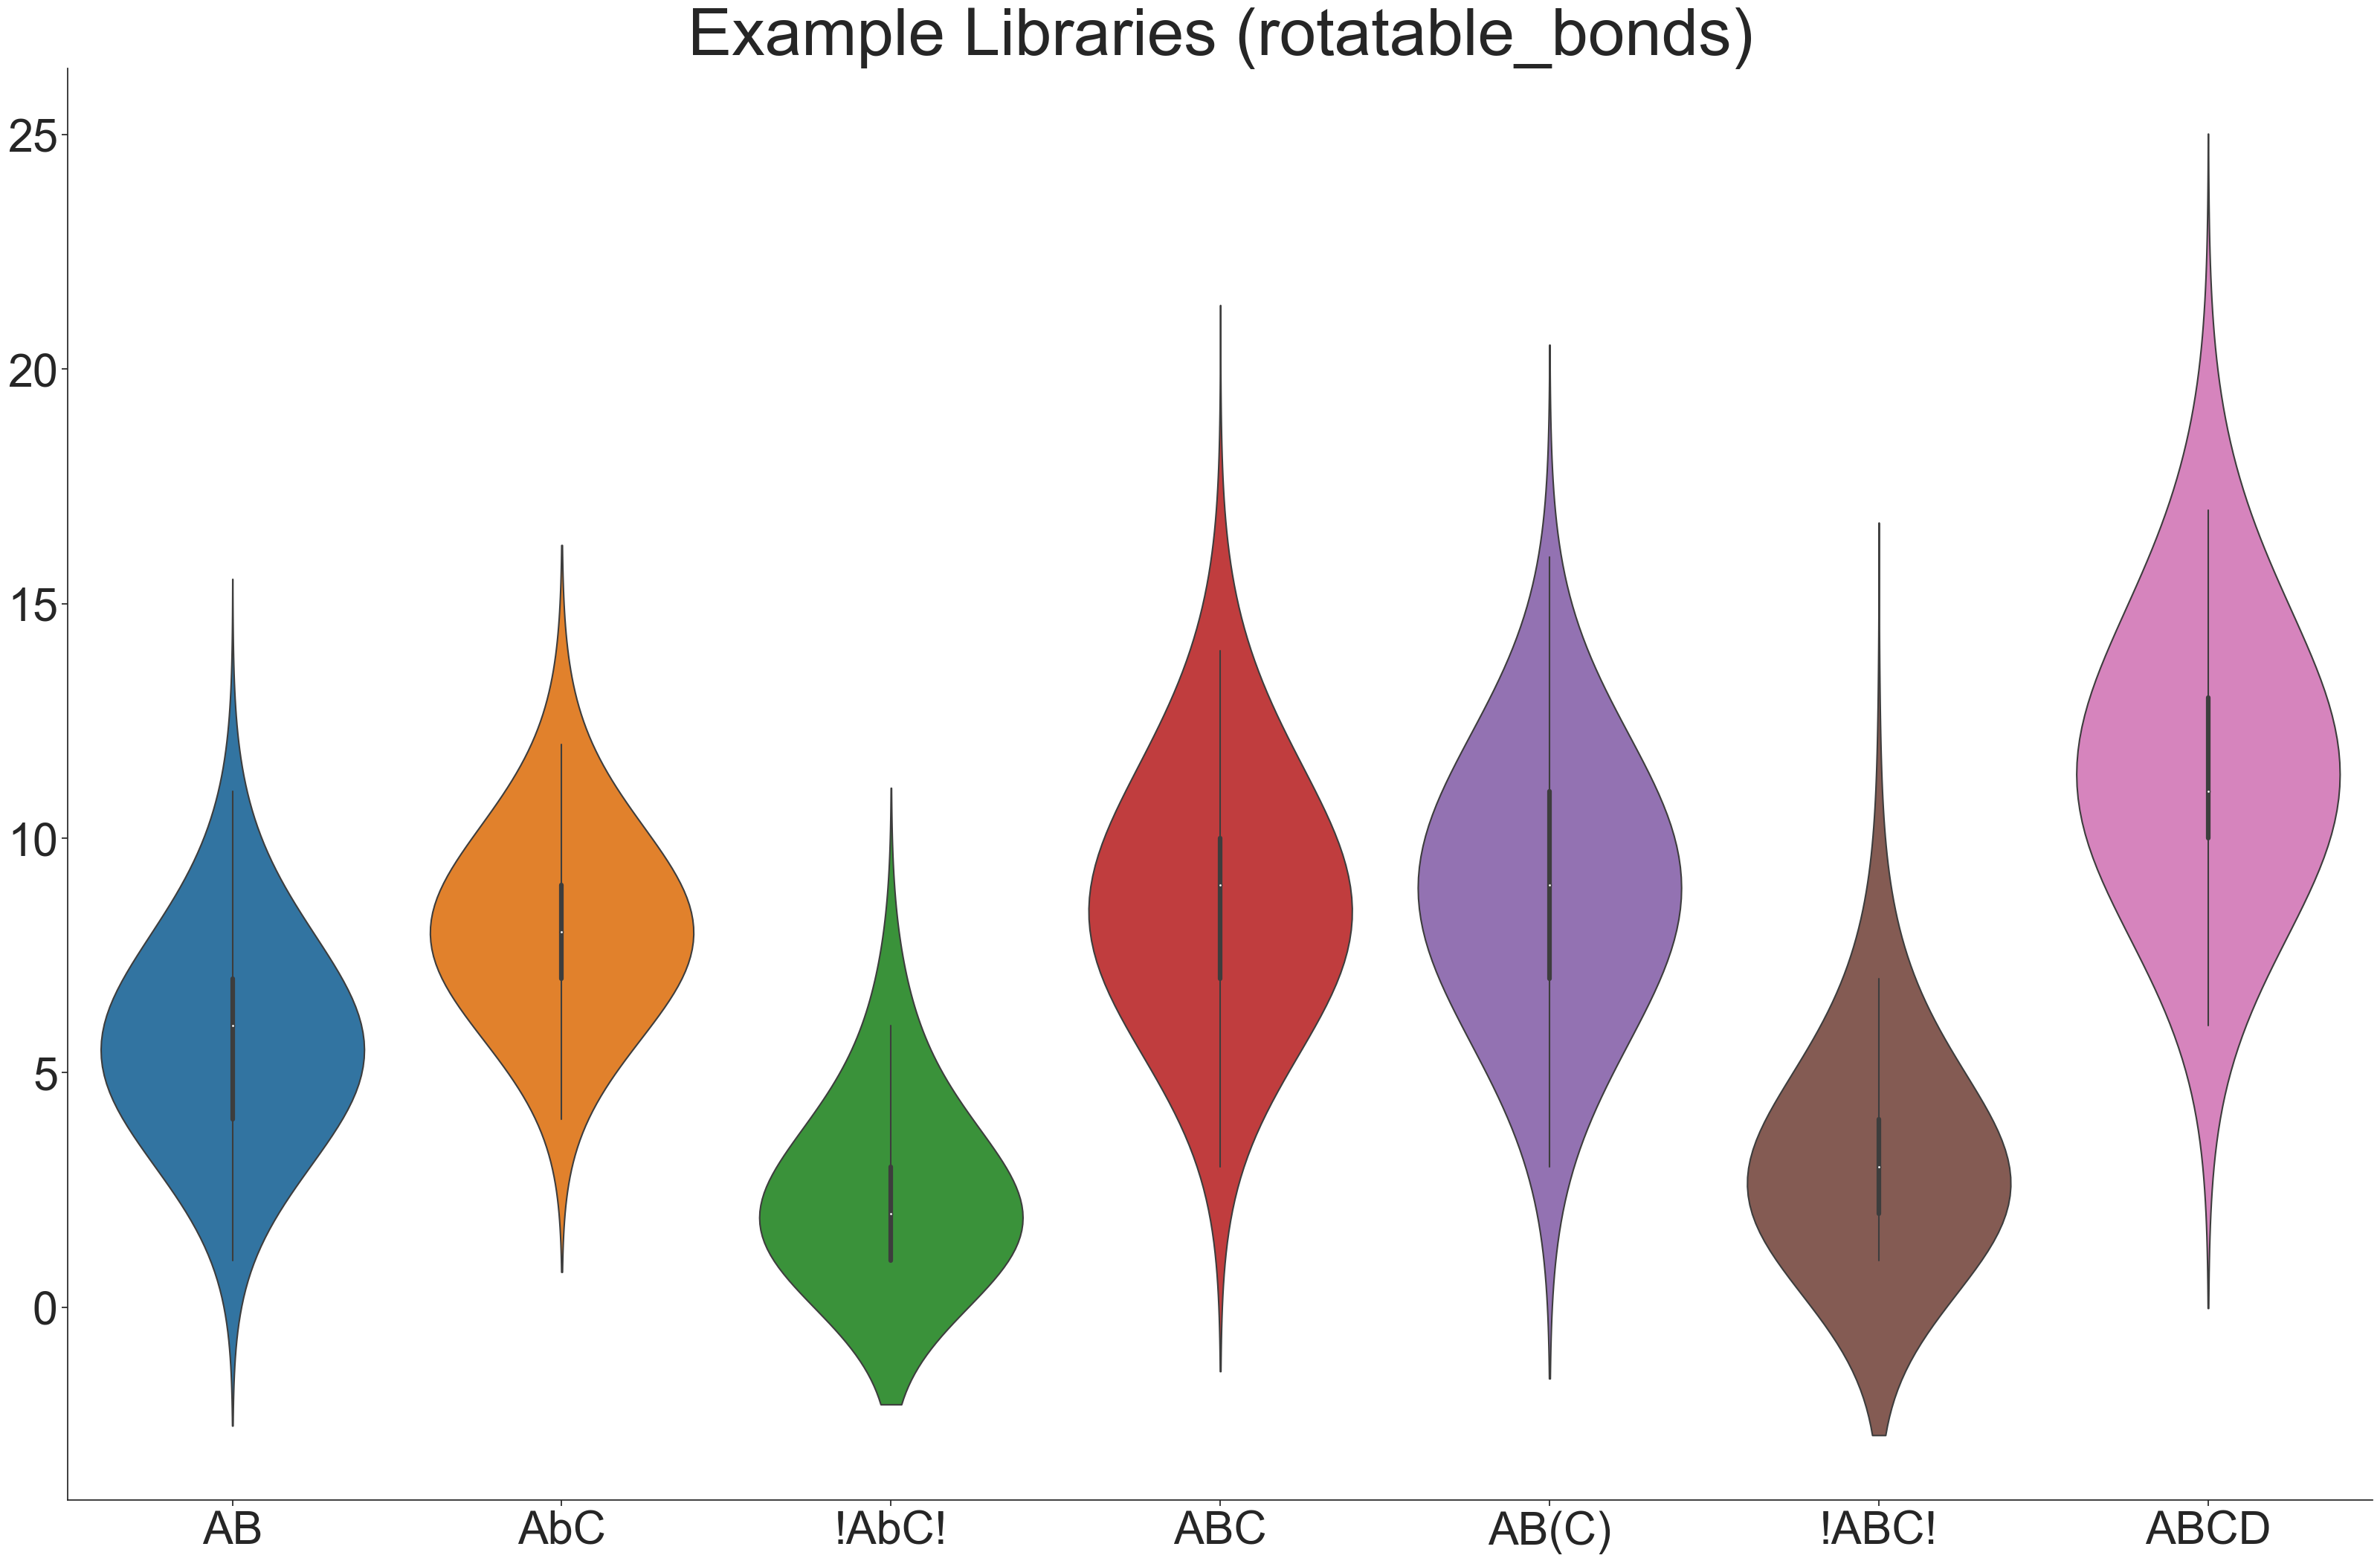

In [11]:
property='rotatable_bonds'

plot_df=MolProps.CompoundProperties.assemble_plot_df(property)

#Comment this line on if you are importing from a csv with pre-calculated values
#prop_df=Property_Dataframe(property)

ax = sns.violinplot(data=plot_df, scale='count', palette=sns.color_palette('tab10'), inner='box', bw=1)

sns.set(rc={'figure.figsize':(40, 25)})
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})  
sns.set(font_scale=4)
plt.title( str(dataset+' ('+property+')'), size =64 )

sns.set_style('ticks')
sns.despine()
plt.savefig(str(dataset+'_'+property+'.svg'), bbox_inches='tight')

Create violin plots for polar surface area distributions

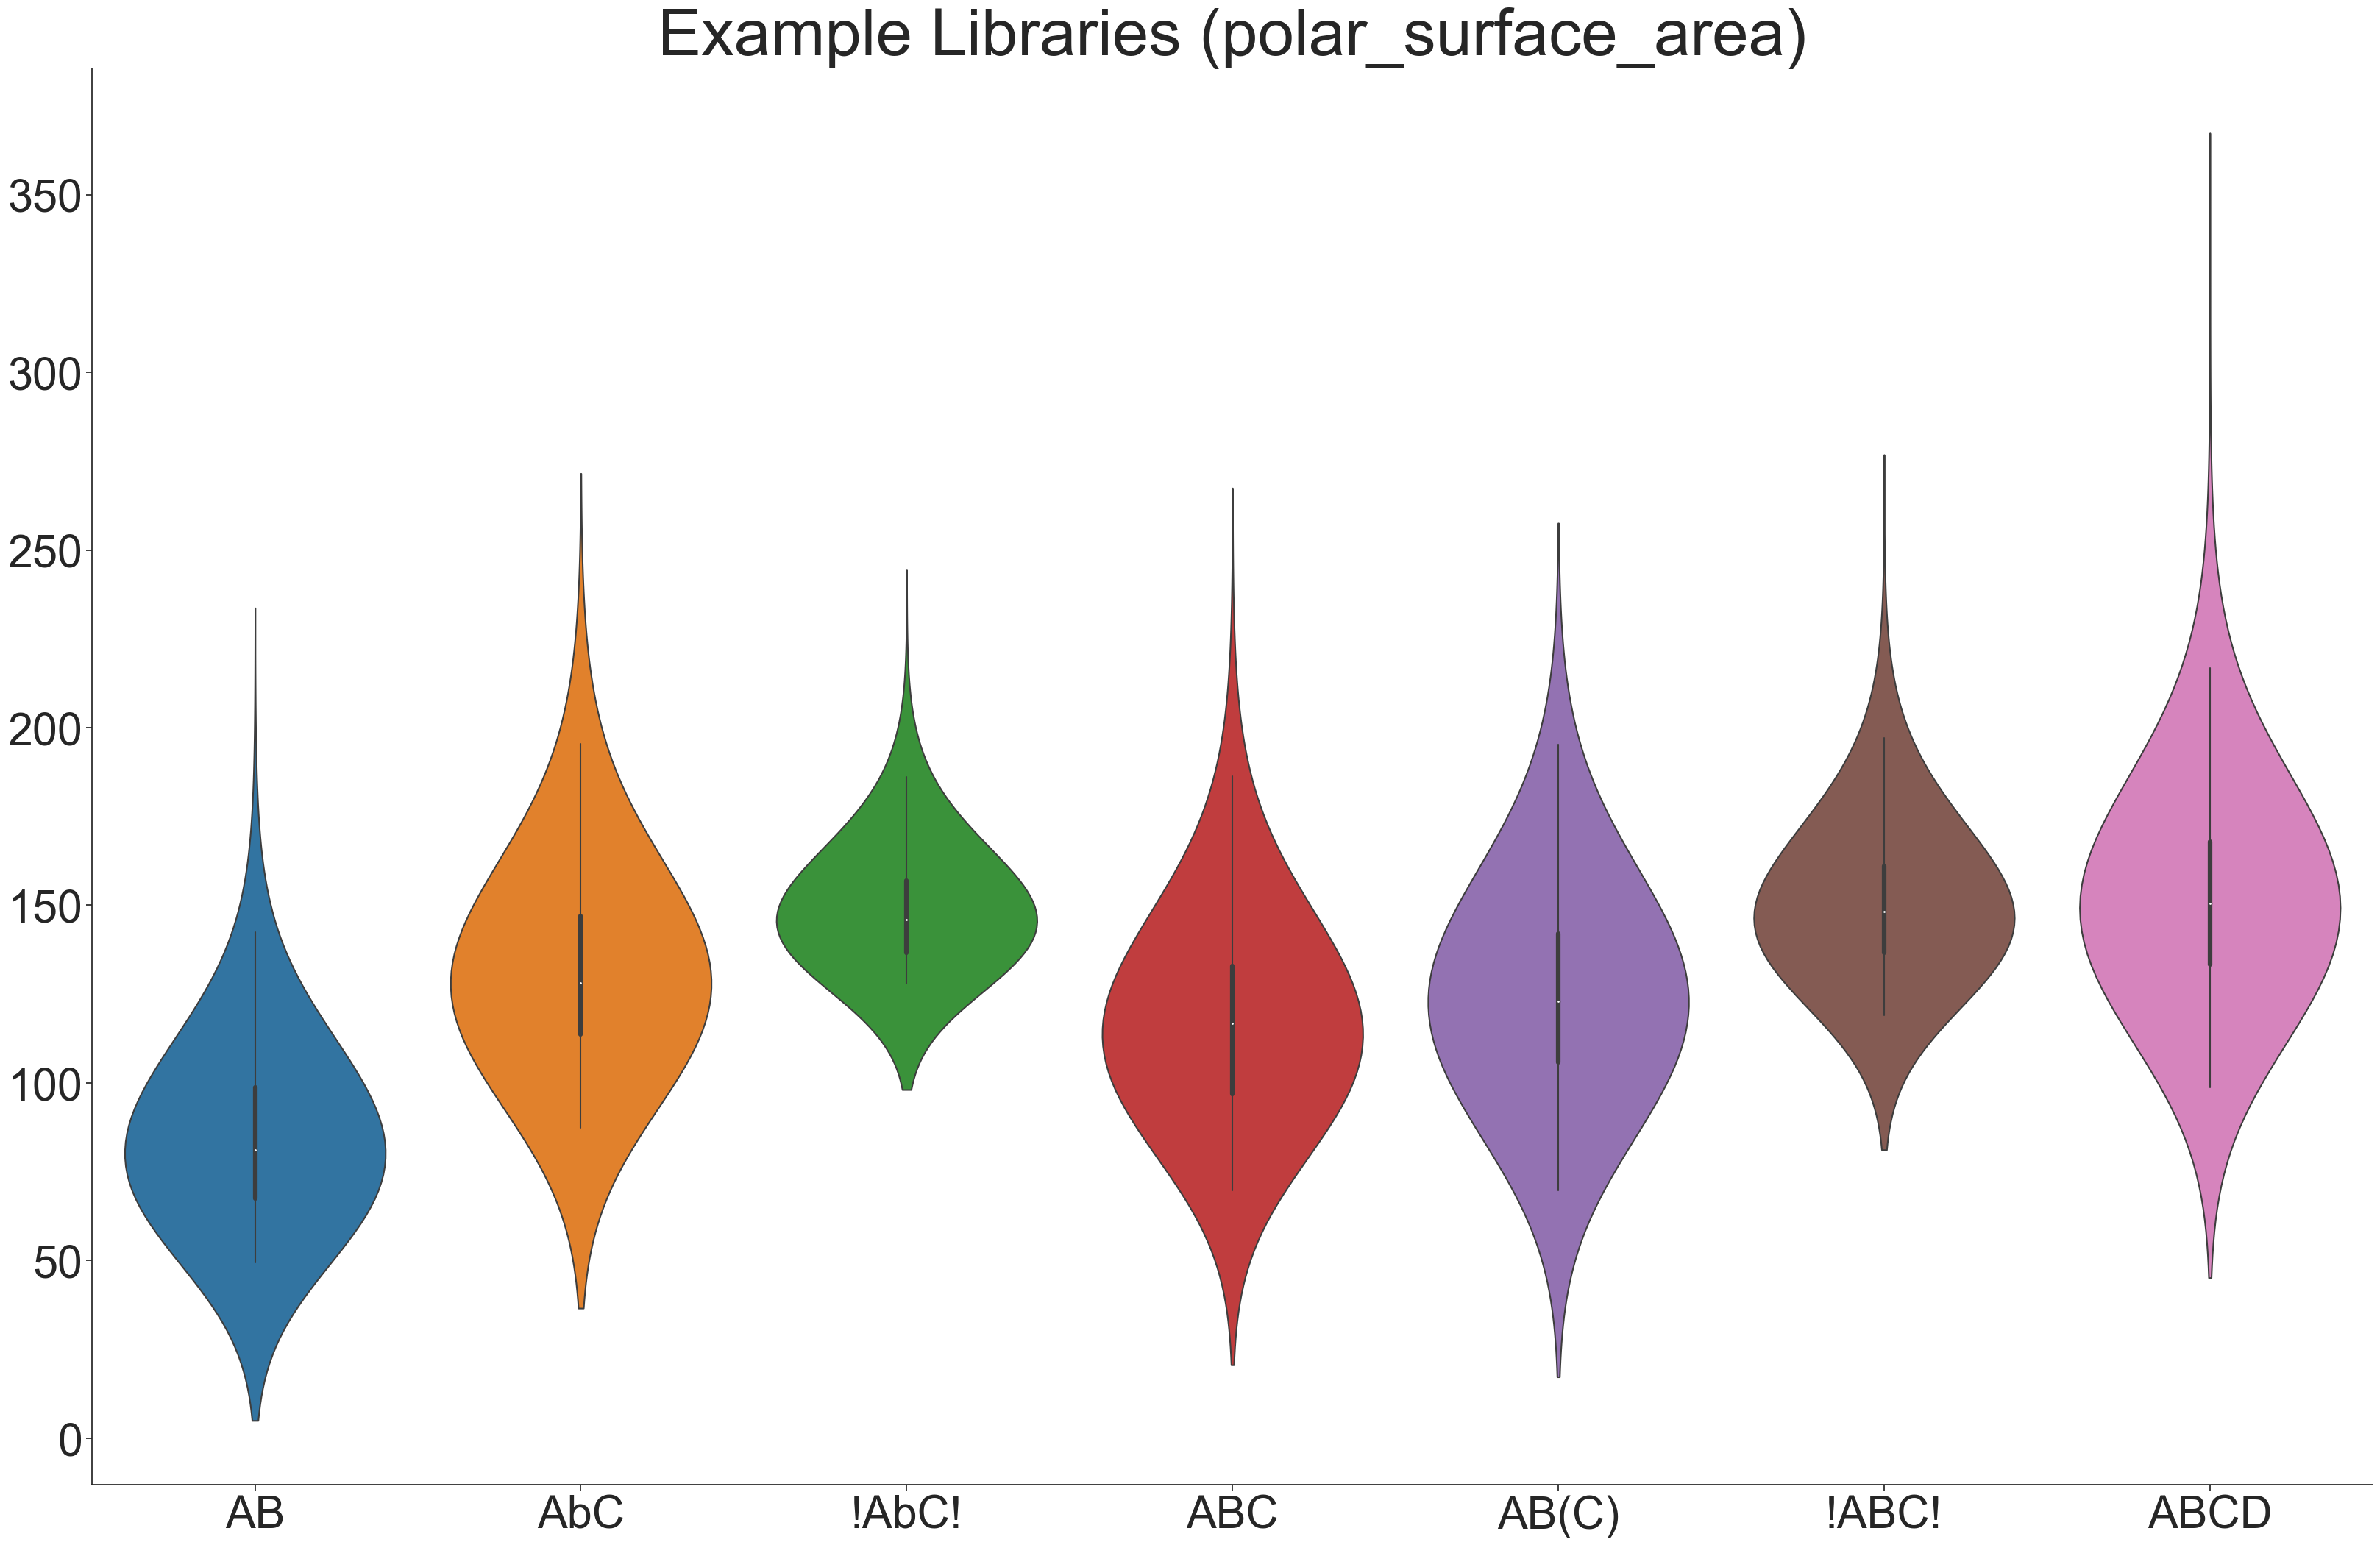

In [12]:
property='polar_surface_area'

plot_df=MolProps.CompoundProperties.assemble_plot_df(property)

#Comment this line on if you are importing from a csv with pre-calculated values
#prop_df=Property_Dataframe(property)

ax = sns.violinplot(data=plot_df, scale='count', palette=sns.color_palette('tab10'), inner='box',bw=1)

sns.set(rc={'figure.figsize':(40, 25)})
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})  
sns.set(font_scale=4)
plt.title( str(dataset+' ('+property+')'), size =64 )

sns.set_style('ticks')
sns.despine()
plt.savefig(str(dataset+'_'+property+'.svg'), bbox_inches='tight')